In [2]:
!pip install wordcloud

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import csv

In [47]:
stopwords = set(STOPWORDS)
stopwords.remove('not')

Importamos csv con las palabras de las reviews y sus frecuencias

In [32]:
df = pd.read_csv("freqPalabrasPos.csv", on_bad_lines='skip')#,index_col=0)
df['count'] =pd.to_numeric(df['count'], errors='coerce')
df['count'] = df['count'].fillna(0).astype(int)
df

,word,count
0,still,535570
1,hope,82832
2,those,185845
3,spoil,10201
4,some,749966
...,...,...
254971,Stratis.,28
254972,2009\nDonut,11
254973,FATEs,25
254974,Arcanist,16


Filtramos las palabras que salen en la lista de las stopwords de la libreria wordcloud y convertimos el dataframe en un diccionario 

In [33]:
df = df[~df['word'].str.lower().isin(stopwords)]
df = df.drop(df[df.word == 'game'].index)
df = df.drop(df[df.word == 'NaN'].index)
new_data = df.set_index('word')['count'].to_dict()


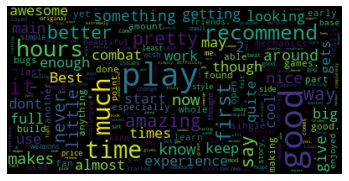

In [34]:
#generamos la wordcloud utilizando el diccionario 
wc = WordCloud(max_font_size=40)
wc.generate_from_frequencies(new_data)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('graficos/wordcloudPos.png')

Generamos graficos de las 25 palabras mas usadas

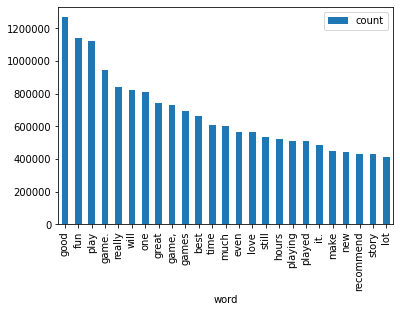

In [22]:
wordPos = df.sort_values(by='count', ascending=False)[1:26]#.head(25)
# plt.plot(wordPos['word'],wordPos['count'])
fig = wordPos.plot(x='word', y='count', kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('graficos/MostUsedWordPosBar.png')

Repetimos para las reviews negativas

In [48]:
df = pd.read_csv("freqPalabrasNeg.csv", on_bad_lines='skip')#,index_col=0)
df['count'] =pd.to_numeric(df['count'], errors='coerce')
df['count'] = df['count'].fillna(0).astype(int)

In [49]:
df = df[~df['word'].str.lower().isin(stopwords)]
df = df.drop(df[df.word == 'game'].index)
df = df.dropna()
new_data = df.set_index('word')['count'].to_dict()

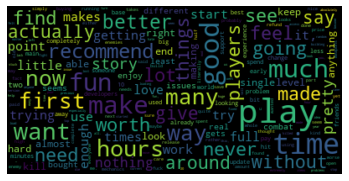

In [50]:
#generamos la wordcloud
wc = WordCloud(max_font_size=40)
wc.generate_from_frequencies(new_data)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('graficos/wordcloudNeg.png')

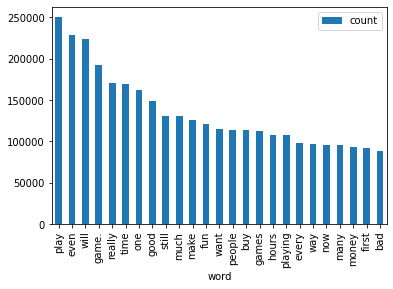

In [51]:
wordNeg = df.sort_values(by='count', ascending=False).head(25)
# plt.plot(wordPos['word'],wordPos['count'])
fig = wordNeg.plot(x='word', y='count', kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('graficos/MostUsedWordNegBar.png')